In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [51]:
government_hospital=pd.read_csv("Data/government_hospitals.csv")

In [52]:
government_hospital.head()

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016


In [53]:
government_hospital =government_hospital.drop(government_hospital.index[0])

In [54]:
government_hospital.head()

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016


In [55]:
government_hospital = government_hospital.rename(columns={government_hospital.columns[2]: 'Rural_Government_Beds', government_hospital.columns[4]: 'Urban_Government_Beds'})


In [56]:
new_names = {
    'States/UTs': 'State/UT',
    'Rural hospitals': 'Rural_Government_Hospitals',
    'Urban hospitals': 'Urban_Government_Hospitals',
    'As on': 'Last_Updated',
    
}

In [57]:
government_hospital = government_hospital.rename(columns=new_names)

In [58]:
government_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State/UT                    37 non-null     object
 1   Rural_Government_Hospitals  37 non-null     object
 2   Rural_Government_Beds       37 non-null     object
 3   Urban_Government_Hospitals  37 non-null     object
 4   Urban_Government_Beds       37 non-null     object
 5   Last_Updated                36 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [59]:
government_hospital['Last_Updated'] = pd.to_datetime(government_hospital['Last_Updated'], format='%d.%m.%Y')


In [60]:
government_hospital_copy=government_hospital.copy()

In [61]:
government_hospital_copy["State/UT"]=government_hospital_copy["State/UT"].str.replace("&","and")

In [62]:
government_hospital_copy["State/UT"]=government_hospital_copy["State/UT"].str.strip("*")

In [63]:
government_hospital_copy

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,208,2136,10,268,2017-12-31
3,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,930,6083,103,5936,2016-12-31
5,Chhattisgarh,169,5070,45,4342,2016-01-01
6,Goa,17,1405,25,1608,2017-12-31
7,Gujarat,364,11715,122,20565,2016-12-31
8,Haryana,609,6690,59,4550,2016-12-31
9,Himachal Pradesh,705,5665,96,6734,2017-12-31
10,Jammu and Kashmir,56,7234,76,4417,2016-12-30


In [64]:
government_hospital_copy.to_csv('Clean_data/government_hospital.csv', index=False)

In [65]:
government_hospital_copy = government_hospital_copy.drop(government_hospital_copy.index[-1])

In [66]:
government_hospital_copy

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,208,2136,10,268,2017-12-31
3,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,930,6083,103,5936,2016-12-31
5,Chhattisgarh,169,5070,45,4342,2016-01-01
6,Goa,17,1405,25,1608,2017-12-31
7,Gujarat,364,11715,122,20565,2016-12-31
8,Haryana,609,6690,59,4550,2016-12-31
9,Himachal Pradesh,705,5665,96,6734,2017-12-31
10,Jammu and Kashmir,56,7234,76,4417,2016-12-30


In [67]:
government_hospital_copy["Rural_Government_Hospitals"]=government_hospital_copy["Rural_Government_Hospitals"].astype(int)
government_hospital_copy["Rural_Government_Beds"]=government_hospital_copy["Rural_Government_Beds"].astype(int)
government_hospital_copy["Urban_Government_Hospitals"]=government_hospital_copy["Urban_Government_Hospitals"].astype(int)
government_hospital_copy["Urban_Government_Beds"]=government_hospital_copy["Urban_Government_Beds"].astype(int)

In [68]:
government_hospital_copy.isna().sum()

State/UT                      0
Rural_Government_Hospitals    0
Rural_Government_Beds         0
Urban_Government_Hospitals    0
Urban_Government_Beds         0
Last_Updated                  0
dtype: int64

## Visuals

<Figure size 1200x800 with 0 Axes>

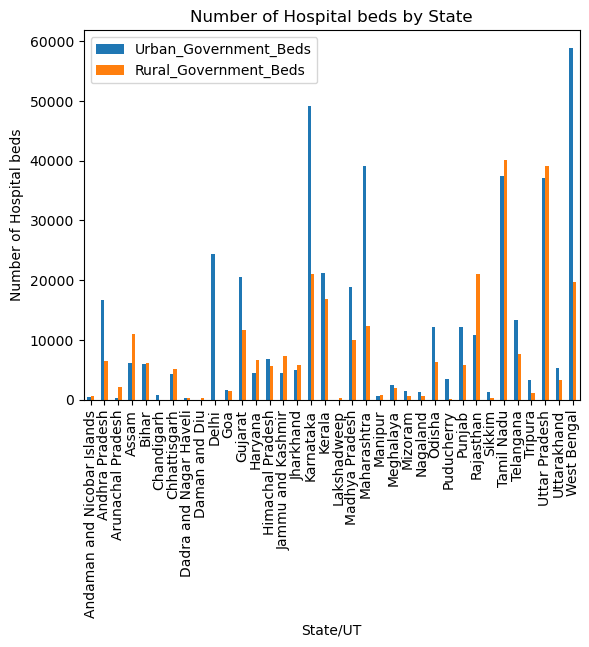

In [72]:
# Group data by state and sum the number of hospital beds for rural and urban areas
grouped_data = government_hospital_copy.groupby('State/UT')[['Urban_Government_Beds', 'Rural_Government_Beds']].sum()

# Create a bar chart
plt.figure(figsize=(12, 8))
grouped_data.plot.bar(rot=0)
plt.title('Number of Hospital beds by State')
plt.xlabel('State/UT')
plt.ylabel('Number of Hospital beds')
plt.xticks(rotation=90)
plt.show()

In [84]:
data=government_hospital_copy[["Rural_Government_Beds","Urban_Government_Beds","State/UT"]]
data = data.set_index('State/UT')
data.head()

,Rural_Government_Beds,Urban_Government_Beds
State/UT,,
Andhra Pradesh,6480,16658
Arunachal Pradesh,2136,268
Assam,10944,6198
Bihar,6083,5936
Chhattisgarh,5070,4342


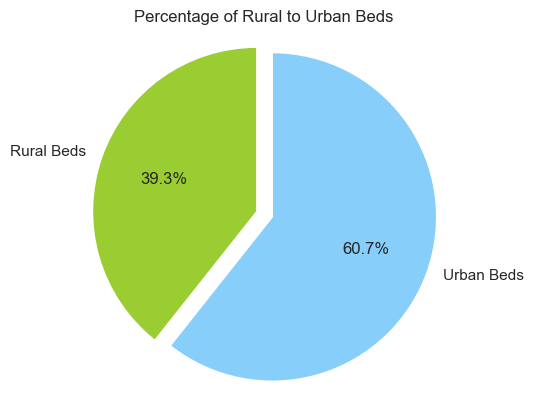

In [92]:
data['percentage'] = data['Rural_Government_Beds'] / data['Urban_Government_Beds'] * 100


# create a pie chart
labels = ['Rural Beds', 'Urban Beds']
sizes = [data['Rural_Government_Beds'].sum(), data['Urban_Government_Beds'].sum()]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode the 'Rural Beds' slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

# add a title
plt.title('Percentage of Rural to Urban Beds')

# show the plot
plt.axis('equal')
# save the plot as a PNG file
plt.savefig('rural_urban_beds.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>